In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
from scipy.stats import linregress as lreg

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth']=1

def langmuir(x, a, b):
    langmuir.has_been_called = True
    return a*b*x/(1+ b*x)

def freundlich(x, a, b):
    freundlich.has_been_called = True
    return a*(x**(1/b))

def toth(x, a, b, c):
    toth.has_been_called = True
    return a*b*x/((1+ (b*x)**c)**(1/c))

def sips(x, a, b, c):
    sips.has_been_called = True
    return a*(b*x)**(1/c)/(1+ (b*x)**(1/c))

def temkin(x, a, b):
    temkin.has_been_called = True
    return b*np.log(a*x)

def dubinin_r(x, a, b):
    dubinin_r.has_been_called = True
    T = 298
    R = 8.314
    return a*np.exp(-b*(np.log((1+(1/x))))**(2))

def residual(y,y_pred):
    res = y - y_pred
    
    if ad_model == toth or ad_model == sips:
        residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-3))
        
    residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-2))    
    residual = [(res[i] - np.mean(res)/residual_s) for i in range(len(res))]
    residual = np.around(residual, decimals=3, out=None)
    return res, residual, residual_s

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = lreg(x, y)
    return r_value**2

langmuir.has_been_called = False
freundlich.has_been_called = False
toth.has_been_called = False
sips.has_been_called = False
temkin.has_been_called = False
dubinin_r.has_been_called = False

x = [0.36, 1.26, 2.69, 3.95, 5.93, 8.98, 16.89, 26.23]
y = [3.76, 6.15, 12.35, 14.49, 17.39, 21.96, 22.93, 23.17]
x_m = np.linspace(start=0.001, stop=np.max(x), num=100)
y_axis_max = np.zeros(6)

The Toth coefficients are q_m = 24.545 ± 1.660, K_Th = 0.233 ± 0.041 and t = 1.562 ± 0.489


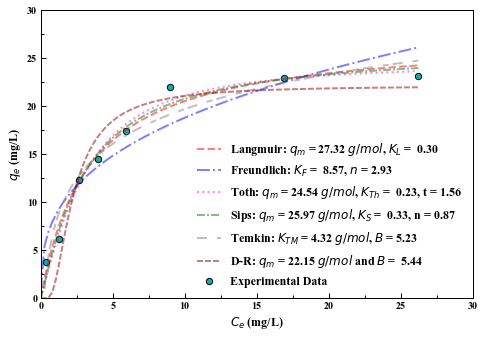

In [8]:
ad_model = toth

#calculating the isotherm parameters
if ad_model == langmuir:
    pars_L, cov_L = curve_fit(ad_model,x, y, p0 = [1,1],method = 'trf')
    stdevs_L = np.sqrt(np.diag(cov_L))
    y_m_L = np.transpose([ad_model(i,pars_L[0], pars_L[1]) for i in x_m])
    y_axis_max[0] = np.max(y_m_L)
    y_pred_L = np.transpose([ad_model(i,pars_L[0], pars_L[1]) for i in x])
    r2_L = rsquared(y,y_pred_L)
    res_L, residual_L, residual_s_L = residual(y,y_pred_L)    
    print('The Langmuir coefficients are q_m = %.3f \u00B1 %.3f and K_L = %.3f \u00B1 %.3f' % (pars_L[0],stdevs_L[0],pars_L[1],stdevs_L[1]))

elif ad_model == freundlich:
    pars_F, cov_F = curve_fit(ad_model,x, y, p0 = [1,1],method = 'trf')
    stdevs_F = np.sqrt(np.diag(cov_F))
    y_m_F = np.transpose([ad_model(i,pars_F[0], pars_F[1]) for i in x_m])
    y_axis_max[1] = np.max(y_m_F)
    y_pred_F = np.transpose([ad_model(i,pars_F[0], pars_F[1]) for i in x])
    r2_F = rsquared(y,y_pred_F)
    res_F, residual_F, residual_s_F = residual(y,y_pred_F)
    print('The Freundlich coefficients are K_F = %.3f \u00B1 %.3f and n = %.3f \u00B1 %.3f' % (pars_F[0],stdevs_F[0],pars_F[1],stdevs_F[1]))

elif ad_model == toth:
    pars_Th, cov_Th = curve_fit(ad_model,x, y, p0 = [1,1,1],method = 'trf')
    stdevs_Th = np.sqrt(np.diag(cov_Th))
    y_m_Th = np.transpose([ad_model(i,pars_Th[0], pars_Th[1], pars_Th[2]) for i in x_m])
    y_axis_max[2] = np.max(y_m_Th)
    y_pred_Th = np.transpose([ad_model(i,pars_Th[0], pars_Th[1], pars_Th[2]) for i in x])
    r2_Th = rsquared(y,y_pred_Th)
    res_Th, residual_Th, residual_s_Th = residual(y,y_pred_Th)
    print('The Toth coefficients are q_m = %.3f \u00B1 %.3f, K_Th = %.3f \u00B1 %.3f and t = %.3f \u00B1 %.3f' % (pars_Th[0],stdevs_Th[0],pars_Th[1],stdevs_Th[1], pars_Th[2],stdevs_Th[2]))    
    
elif ad_model == sips:
    pars_S, cov_S = curve_fit(ad_model,x, y, p0 = [1,1,1],method = 'trf')
    stdevs_S = np.sqrt(np.diag(cov_S))
    y_m_S = np.transpose([ad_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x_m])
    y_axis_max[3] = np.max(y_m_S)
    y_pred_S = np.transpose([ad_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x])
    r2_S = rsquared(y,y_pred_S)
    res_S, residual_S, residual_s_Sp = residual(y,y_pred_S)
    print('The Sips coefficients are q_m = %.3f \u00B1 %.3f, K_S = %.3f \u00B1 %.3f and n = %.3f \u00B1 %.3f' % (pars_S[0],stdevs_S[0],pars_S[1],stdevs_S[1], pars_S[2],stdevs_S[2]))    

elif ad_model == temkin:
    pars_TM, cov_TM = curve_fit(ad_model,x, y, p0 = [1,1],method = 'trf')
    stdevs_TM = np.sqrt(np.diag(cov_TM))
    y_m_TM = np.transpose([ad_model(i,pars_TM[0], pars_TM[1]) for i in x_m])
    y_axis_max[4] = np.max(y_m_TM)
    y_pred_TM = np.transpose([ad_model(i,pars_TM[0], pars_TM[1]) for i in x])
    r2_TM = rsquared(y,y_pred_TM)
    res_TM, residual_TM, residual_s_TM = residual(y,y_pred_TM)
    print('The Temkin coefficients are K_TH = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_TM[0],stdevs_TM[0],pars_TM[1],stdevs_TM[1]))   

elif ad_model == dubinin_r:
    pars_DR, cov_DR = curve_fit(ad_model,x, y, p0 = [1,1], method = 'trf')
    stdevs_DR = np.sqrt(np.diag(cov_DR))
    y_m_DR = np.transpose([ad_model(i,pars_DR[0], pars_DR[1]) for i in x_m])
    y_axis_max[5] = np.max(y_m_DR)
    y_pred_DR = np.transpose([ad_model(i,pars_DR[0], pars_DR[1]) for i in x])
    r2_DR = rsquared(y,y_pred_DR)
    res_DR, residual_DR, residual_s_DR = residual(y,y_pred_DR)
    print('The D-R coefficients are q_m = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_DR[0],stdevs_DR[0],pars_DR[1],stdevs_DR[1]))   
    
#plotting graphs corresponding to the isotherms
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.scatter(x, y, s=40, color='#00b3b3', label='Experimental Data', edgecolor = 'black')
ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax.set_xlim([0, math.ceil(np.max(x)/ 5.0) * 5])

#determine the y_limit
if np.max(y_axis_max) < np.max(y):
    max_y = np.max(y)
else:
    max_y = np.max(y_axis_max) 
    
ax.set_ylim([0, math.ceil(np.max(max_y)/ 5.0) * 5])

#plotting
if langmuir.has_been_called:
    ax.plot(x_m, y_m_L, linestyle='--', linewidth=2, color='red', label='Langmuir: $q_{m}$ = %5.2f $g/mol$, $K_{L}$ = %5.2f' % tuple(pars_L), alpha =0.5)
    
if freundlich.has_been_called:
    ax.plot(x_m, y_m_F, linestyle='-.', linewidth=2, color='blue', label='Freundlich: $K_{F}$ = %5.2f, $n$ =%5.2f' % tuple(pars_F), alpha =0.5)

if toth.has_been_called:
    ax.plot(x_m, y_m_Th, linestyle=':', linewidth=2, color='magenta', label='Toth: $q_{m}$ = %5.2f $g/mol$, $K_{Th}$ = %5.2f, t = %.2f' % tuple(pars_Th), alpha =0.5)

if sips.has_been_called:
    ax.plot(x_m, y_m_S, dashes=[4, 1, 1, 1], linewidth=2, color='g', label='Sips: $q_{m}$ = %5.2f $g/mol$, $K_{S}$ = %5.2f, n = %.2f' % tuple(pars_S), alpha =0.5)

if temkin.has_been_called:
    ax.plot(x_m, y_m_TM, dashes=[5, 5, 3, 2], linewidth=2, color='grey', label='Temkin: $K_{TM}$ = %.2f $g/mol$, $B$ = %.2f' % tuple(pars_TM), alpha =0.5)

if dubinin_r.has_been_called:
    ax.plot(x_m, y_m_DR, dashes=[3, 1, 3, 1], linewidth=2, color='darkred', label='D-R: $q_{m}$ = %.2f $g/mol$ and $B$ = %5.2f' % tuple(pars_DR), alpha =0.5)

ax.set_xlabel('$C_{e}$ (mg/L)', fontsize = 12)
ax.set_ylabel('$q_{e}$ (mg/L)', fontsize = 12)
plt.legend(loc = 4,frameon=False,fontsize=12)
fig.savefig('Isotherms/isotherms.pdf',bbox_inches='tight', dpi = 1200)

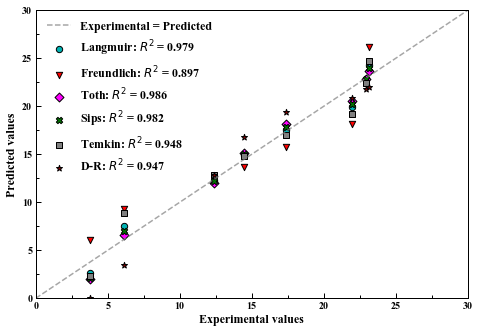

In [9]:
#Comparison of the model values with the experimental values
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.xaxis.set_minor_locator(MultipleLocator(2.5))
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(2.5))
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.plot([0,math.ceil(np.max(y)/ 5.0) * 5 + 5],[0,math.ceil(np.max(y)/ 5.0) * 5+ 5], color='grey', linestyle='dashed', label = 'Experimental = Predicted', alpha = 0.7)

if langmuir.has_been_called:
    ax2.scatter(y, y_pred_L, s=40, color='#00b3b3', label='Langmuir: $R^{2}$ = %.3f' %r2_L, edgecolor = 'black')

if freundlich.has_been_called:
    ax2.scatter(y, y_pred_F, s=40, color='red', label='Freundlich: $R^{2}$ = %.3f' %r2_F, marker = 'v', edgecolor = 'black')

if toth.has_been_called:
    ax2.scatter(y, y_pred_Th, s=40, color='magenta', label='Toth: $R^{2}$ = %.3f' %r2_Th, marker = 'D', edgecolor = 'black')
    
if sips.has_been_called:
    ax2.scatter(y, y_pred_S, s=40, color='g', label='Sips: $R^{2}$ = %.3f' %r2_S, marker = 'X', edgecolor = 'black')

if temkin.has_been_called:
    ax2.scatter(y, y_pred_TM, s=40, color='grey', label='Temkin: $R^{2}$ = %.3f' %r2_TM, marker = 's', edgecolor = 'black')
    
if dubinin_r.has_been_called:
    ax2.scatter(y, y_pred_DR, s=40, color='darkred', label='D-R: $R^{2}$ = %.3f' %r2_DR, marker = '*', edgecolor = 'black')
    
ax2.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax2.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax2.set_xlim([0, math.ceil(np.max(y)/ 5.0) * 5 + 5])
ax2.set_ylim([0, math.ceil(np.max(max_y)/ 5.0) * 5])

ax2.set_xlabel('Experimental values', fontsize = 12)
ax2.set_ylabel('Predicted values', fontsize = 12)
ax2.legend(loc=2, frameon=False, fontsize=12)
fig2.savefig('Isotherms/accuracy.pdf',bbox_inches='tight', dpi = 1200)

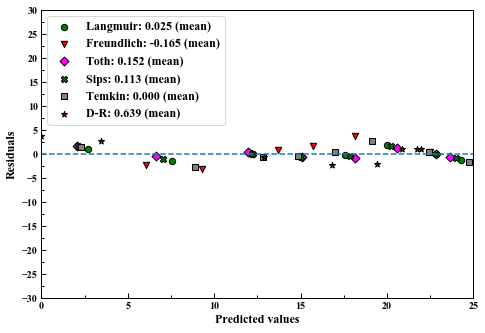

In [10]:
#Residual analysis
fig3 = plt.figure()
ax3 = fig3.add_axes([0, 0, 1, 1])
ax3.xaxis.set_minor_locator(MultipleLocator(2.5))
ax3.xaxis.set_major_locator(MultipleLocator(5))
ax3.yaxis.set_minor_locator(MultipleLocator(2.5))
ax3.yaxis.set_major_locator(MultipleLocator(5))

if langmuir.has_been_called:
    ax3.scatter(y_pred_L, res_L, s=40, color='g', label='Langmuir: %.3f (mean)' %np.mean(res_L), edgecolor = 'black')
    
if freundlich.has_been_called:
    ax3.scatter(y_pred_F, res_F, s=40, color='red', label='Freundlich: %.3f (mean)' %np.mean(res_F), marker = 'v', edgecolor = 'black')

if toth.has_been_called:
    ax3.scatter(y_pred_Th, res_Th, s=40, color='magenta', label='Toth: %.3f (mean)' %np.mean(res_Th), marker = 'D', edgecolor = 'black')
    
if sips.has_been_called:
    ax3.scatter(y_pred_S, res_S, s=40, color='g', label='Sips: %.3f (mean)' %np.mean(res_S), marker = 'X', edgecolor = 'black')

if temkin.has_been_called:
    ax3.scatter(y_pred_TM, res_TM, s=40, color='grey', label='Temkin: %.3f (mean)' %np.mean(res_TM), marker = 's', edgecolor = 'black')

if dubinin_r.has_been_called:
    ax3.scatter(y_pred_DR, res_DR, s=40, color='darkred', label='D-R: %.3f (mean)' %np.mean(res_DR), marker = '*', edgecolor = 'black')

ax3.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax3.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax3.set_xlim([0, math.ceil(np.max(y)/ 5.0) * 5])
ax3.set_ylim([math.ceil(np.max(max_y)/ 5.0) * -5, math.ceil(np.max(max_y)/ 5.0) * 5])
ax3.plot([0,math.ceil(np.max(x)/ 5.0) * 5],[0,0], linestyle='dashed')
ax3.set_xlabel('Predicted values', fontsize = 12)
ax3.set_ylabel('Residuals', fontsize = 12)
plt.legend(frameon=True, loc=2, fontsize = 12)
fig3.savefig('Isotherms/residuals.pdf',bbox_inches='tight', dpi = 1200)

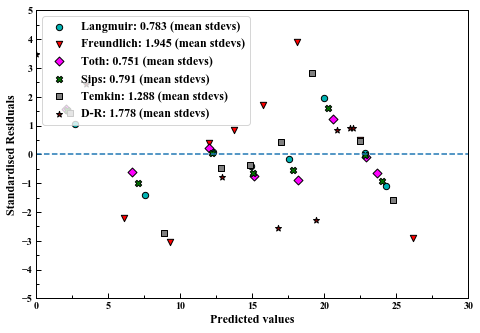

In [11]:
#Standardised residual analysis
fig4 = plt.figure()
ax4 = fig4.add_axes([0, 0, 1, 1])
ax4.xaxis.set_minor_locator(MultipleLocator(2.5))
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.yaxis.set_minor_locator(MultipleLocator(0.5))
ax4.yaxis.set_major_locator(MultipleLocator(1))

if langmuir.has_been_called:
    ax4.scatter(y_pred_L, residual_L, s=40, color='#00b3b3', label='Langmuir: %.3f (mean stdevs)' %np.mean(np.abs(residual_L)), edgecolor = 'black')
    
if freundlich.has_been_called:
    ax4.scatter(y_pred_F, residual_F, s=40, color='red', label='Freundlich: %.3f (mean stdevs)' %np.mean(np.abs(residual_F)), marker = 'v', edgecolor = 'black')

if toth.has_been_called:
    ax4.scatter(y_pred_Th, residual_Th, s=40, color='magenta', label='Toth: %.3f (mean stdevs)' %np.mean(np.abs(residual_Th)), marker = 'D', edgecolor = 'black')

if sips.has_been_called:
    ax4.scatter(y_pred_S, residual_S, s=40, color='g', label='Sips: %.3f (mean stdevs)' %np.mean(np.abs(residual_S)), marker = 'X', edgecolor = 'black')    

if temkin.has_been_called:
    ax4.scatter(y_pred_TM, residual_TM, s=40, color='grey', label='Temkin: %.3f (mean stdevs)' %np.mean(np.abs(residual_TM)), marker = 's', edgecolor = 'black')    

if dubinin_r.has_been_called:
    ax4.scatter(y_pred_DR, residual_DR, s=40, color='darkred', label='D-R: %.3f (mean stdevs)' %np.mean(np.abs(residual_DR)), marker = '*', edgecolor = 'black')    

ax4.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax4.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
ax4.set_xlim([0, math.ceil(np.max(max_y)/ 5.0) * 5])
ax4.set_ylim([-5, 5])
ax4.plot([0,math.ceil(np.max(max_y)/ 5.0) * 5],[0,0], linestyle='dashed')
#ax4.plot([0,math.ceil(np.max(y_pred_F)/ 5.0) * 5],[3,3], linestyle='dashed', color = 'red')
#ax4.plot([0,math.ceil(np.max(y_pred_F)/ 5.0) * 5],[-3,-3], linestyle='dashed', color = 'red', label = 'Acceptable region')
ax4.set_xlabel('Predicted values', fontsize = 12)
ax4.set_ylabel('Standardised Residuals', fontsize = 12)
plt.legend(frameon=True, loc=2, fontsize = 12)
fig4.savefig('Isotherms/residuals_standardised.pdf',bbox_inches='tight', dpi = 1200)